-88303.18915238194 181208083.1073298


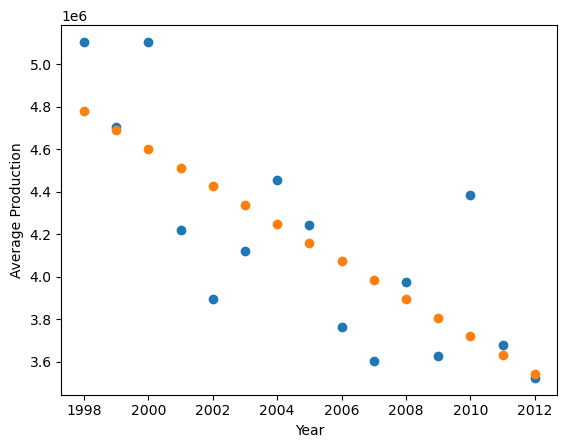

In 2030, the honey production might shrink up to [1952609.12799445]
In 2040, the honey production might shrink up to [1069577.23647064]


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# import CSV file and transform into dataframe 
honey= pd.read_csv('honeyproduction.csv')
honey.head()

#create a new dataframe that groups the honey dataframe by the 'years' column and aggregates the 'totalprod' column by the mean 
prod_per_year=honey.groupby('year').agg({'totalprod':'mean'}).reset_index()

# The years should be our feature, let's reshape it for better use of scikit-learn later
X=prod_per_year['year'].values.reshape(-1,1)

# The depending variable for our model will be the total production for each year
y=prod_per_year['totalprod'].values

# plot the years and total honey productions
plt.scatter(X,y)
plt.xlabel('Year')
plt.ylabel('Average Production')

# create the linear regression model with scikit
honey_prediction= LinearRegression()
honey_prediction.fit(X,y)

# print the slope with .coef_ and the intercept with .intercept_ 
print(honey_prediction.coef_[0],honey_prediction.intercept_)

# make predictions for the year values in X
y_predict= honey_prediction.predict(X)

# plot the predictions and years on the same plot 
plt.scatter(X,y_predict)
plt.show()

# let's predict what the honey production might look like in 2030 and 2040 ad output everything with f-strings
print(f'In 2030, the honey production might shrink up to {honey_prediction.predict(np.array([[2030]]))}')
print(f'In 2040, the honey production might shrink up to {honey_prediction.predict(np.array([[2040]]))}')